<a href="https://colab.research.google.com/github/sharma-aarushi/Applied-Computer-Vision/blob/main/hw2_Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fun with Multimodal Models

In this assignment, we are going to use some of the building blocks we've learned so far to construct two different multimodal models using tools from the Huggingface library as well as pre-trained models from PyTorch's `torchvision`.

The goal of a multimodal model is to take inputs from two or more modalities, and jointly inference on them to make a prediction.  Here, we will be using the Hateful Memes (https://ai.meta.com/blog/hateful-memes-challenge-and-data-set/) dataset, which has the goal of classifying a pair of an image with an associated caption as either Hateful or not (binary classification).

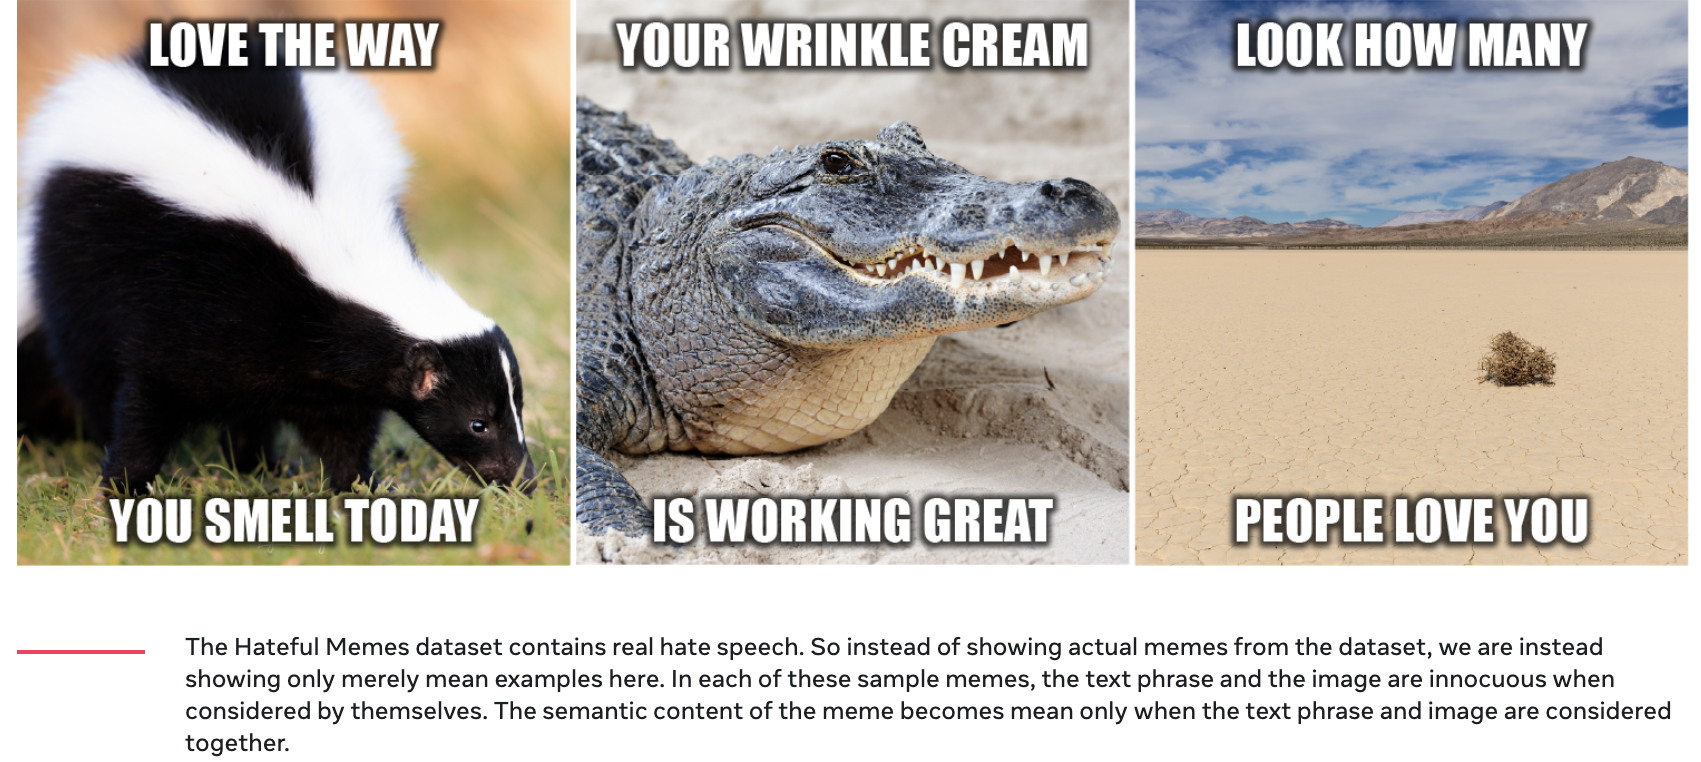



In [ ]:
# Install Huggingface locally (may not be necessary)
!pip install transformers

In [ ]:
# Download the Hateful memes dataset from Google Drive.  We need gdown
# for this (may not be necessary to pip install)
!pip install gdown

In [ ]:
!gdown "https://drive.google.com/uc?id=1NH3DTDuNVsLInGQaLug7w49AHOnWJaKQ"

In [ ]:
!unzip "hateful_memes.zip" -d .

In [ ]:
!ls data

In [ ]:
# Create a PyTorch Dataset for the Hateful Memes data.  You will likely need to
# create your own `collate_fn` function for the data loader
#
# To do this, poke around the directory structure of the data and figure
# out how to parse the files (this is a useful skill, so I'd rather you figure
# this out than me tell you what it looks like).  Hint: look at the json files.
#
# A suggestion for what your __getitem__ should return is a dictionary,
# with keys "image", "caption", and "label".  But do as you'd like.

### Part 1: Concatenation Model

For a baseline, we will create a late-fusion concatenation-based model.  What this means is we will load in a pre-trained image encoder from your favorite `PyTorch`'s `torchvision` ImageNet-trained model (your choice: https://pytorch.org/vision/stable/models.html#classification) to encode embeddings from the images, and load in a pre-trained transformer from `Huggingface` (use `BERT`: https://huggingface.co/docs/transformers/model_doc/bert) to encode embeddings from the captions.  Then we will concatenate these together, and make a 1-layer classifier layer to predict on the Hateful Memes task.

You may set the hyper-parameters yourself.  Be mindful of the batch size, optimizer, max epochs, and learning rate.  Be clean with your training to avoid overfitting.  Report the **accuracy** on the validation set (they do not give a proper test set b/c this is a real dataset competition).

You can also play around with freezing one, both, or neither of the pre-trained encoders (or just fine-tune the final layers of one, both, or neither).  Using print/logging, make it clear what your best result is and what the hyper-parameters are that resulted in that solution.

In [ ]:
# Create your data loaders and setup hyper-parameters

In [ ]:
# Create your nn.Module for your concatenation multimodal model.
# (make sure to conform to the outputs of your dataset/loader)

In [ ]:
# Do your training loop + eval, etc...

### Part 2: Multimodal Transformers

Here, what you will do is leverage the open-source code from Huggingface to access the internals of the BERT language model (https://huggingface.co/docs/transformers/model_doc/bert) and construct a model that fuses image embeddings from a pre-trained CNN (you may choose your favorite from torchvision) with the token embeddings from the language (on the given caption), and glue all of this together to produce a binary classification model on the Hateful Memes dataset.

Use the Huggingface `Trainer` class as we showed in class.  Choose your own `batch_size` parameter, and use the `Adam` optimizer.  Use Huggingface's built-in learning rate scheduler to use `cosine` decay with a base learning rate of 1e-3.

When you construct your model architecture, you should take care to use positional embeddings for the image embeddings that are different from those that are used for the language token embeddings.  Also, you should add in an additional, learned "modality embedding" which messages to the model which "token feature" is coming from an image versus coming from language (recall how we do this with `nn.Embedding`).  What we want to accomplish here is "Early Fusion", meaning that the image and language embeddings are fused together EARLY on in the model (e.g., before they enter the Transformer Encoder).  Therefore, your job is to "get in" to the Huggingface code to be able to manipulate all of the embeddings to pull out and combine all this information as you see fit.

How does this model compare with the concatenation-based model?

In [ ]:
# Make sure to not forget the tokenizers.  You may find it helpful to use
# the ResNet that is built-in to Huggingface, rather than from torchvision,
# but it is completely up to you. You may also try to experiment with some
# of the pre-trained Vision Transformers as well

Some possible tips:


*   Using the full-sized BERT transformer may be too large to train in Google collab, even on a GPU, before it times out.  This is OK--you can modify the size of the transformer to be whatever size you want.  For example, reduce the number of layers, and/or the embedding sizes, etc.  YOU CAN CONTROL THE HYPER-PARAMETERS of the transformer encoder--just keep in mind if you do that, then it will not be pre-trained.  But if you are making a SMALLER transformer, then this may be fine to train from scratch. (We are not looking for SOTA performance)
*   Consider freezing the image encoder so that you don't need to re-train those weights as well.



In [ ]:
# Create your nn.Module

In [ ]:
# Setup the TrainingArguments and the Trainer

In [ ]:
# Train and evaluate (note with the Trainer, you do not need to write your
# own training loop or evaluation code).